<a href="https://colab.research.google.com/github/hamza74372/Loan-Approval-prediction/blob/main/Loan_Approval_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


{'test.csv': b'Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area\r\nLP001015,Male,Yes,0,Graduate,No,5720,0,110,360,1,Urban\r\nLP001022,Male,Yes,1,Graduate,No,3076,1500,126,360,1,Urban\r\nLP001031,Male,Yes,2,Graduate,No,5000,1800,208,360,1,Urban\r\nLP001035,Male,Yes,2,Graduate,No,2340,2546,100,360,,Urban\r\nLP001051,Male,No,0,Not Graduate,No,3276,0,78,360,1,Urban\r\nLP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152,360,1,Urban\r\nLP001055,Female,No,1,Not Graduate,No,2226,0,59,360,1,Semiurban\r\nLP001056,Male,Yes,2,Not Graduate,No,3881,0,147,360,0,Rural\r\nLP001059,Male,Yes,2,Graduate,,13633,0,280,240,1,Urban\r\nLP001067,Male,No,0,Not Graduate,No,2400,2400,123,360,1,Semiurban\r\nLP001078,Male,No,0,Not Graduate,No,3091,0,90,360,1,Urban\r\nLP001082,Male,Yes,1,Graduate,,2185,1516,162,360,1,Semiurban\r\nLP001083,Male,No,3+,Graduate,No,4166,0,40,180,,Urban\r\nLP001094,Male,Yes,2,Graduate,,12173

In [2]:
import pandas as pd

# Load train and test datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Quick look
print(train_df.head())
print(test_df.head())
print(train_df.info())
print(test_df.isnull().sum())


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Load data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Fill missing values
for df in [train_df, test_df]:
    df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
    df['Married'].fillna(df['Married'].mode()[0], inplace=True)
    df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
    df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
    df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
    df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)
    df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

# Encode categorical features consistently
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents']
for col in categorical_cols:
    le = LabelEncoder()
    le.fit(pd.concat([train_df[col], test_df[col]]))  # ensure same encoding
    train_df[col] = le.transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

# Encode target
train_df['Loan_Status'] = train_df['Loan_Status'].map({'N':0, 'Y':1})

# Split features and target
X_train = train_df.drop(['Loan_ID','Loan_Status'], axis=1)
y_train = train_df['Loan_Status']
X_test = test_df.drop(['Loan_ID'], axis=1)


/tmp/ipython-input-2725496620.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
/tmp/ipython-input-2725496620.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [4]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split training data into train/validation (to evaluate)
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Apply SMOTE on training split
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_split, y_train_split)

print("Before SMOTE:", y_train_split.value_counts())
print("After SMOTE:", pd.Series(y_train_smote).value_counts())


Before SMOTE: Loan_Status
1    337
0    154
Name: count, dtype: int64
After SMOTE: Loan_Status
1    337
0    337
Name: count, dtype: int64


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Logistic Regression
lr_model = LogisticRegression(max_iter=500, random_state=42)
lr_model.fit(X_train_smote, y_train_smote)
y_pred_lr = lr_model.predict(X_val)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_smote, y_train_smote)
y_pred_dt = dt_model.predict(X_val)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Logistic Regression Evaluation
print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_val, y_pred_lr))
print(classification_report(y_val, y_pred_lr))

# Decision Tree Evaluation
print("\n=== Decision Tree ===")
print("Accuracy:", accuracy_score(y_val, y_pred_dt))
print(classification_report(y_val, y_pred_dt))


=== Logistic Regression ===
Accuracy: 0.7967479674796748
              precision    recall  f1-score   support

           0       0.66      0.71      0.68        38
           1       0.87      0.84      0.85        85

    accuracy                           0.80       123
   macro avg       0.76      0.77      0.77       123
weighted avg       0.80      0.80      0.80       123


=== Decision Tree ===
Accuracy: 0.6991869918699187
              precision    recall  f1-score   support

           0       0.51      0.68      0.58        38
           1       0.83      0.71      0.76        85

    accuracy                           0.70       123
   macro avg       0.67      0.70      0.67       123
weighted avg       0.73      0.70      0.71       123



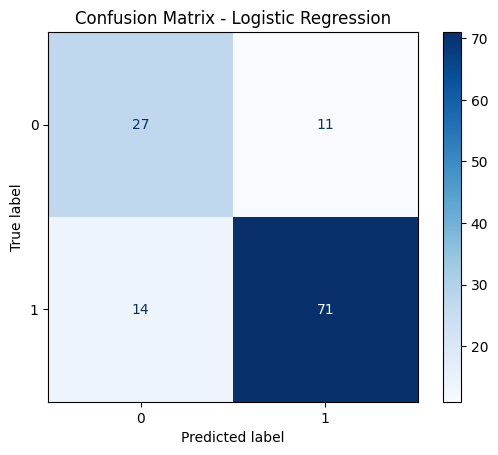

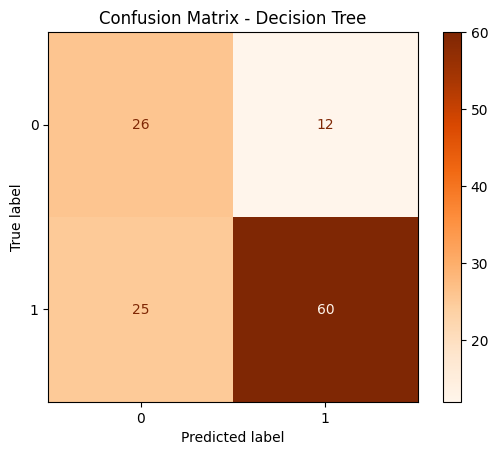

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Logistic Regression
cm_lr = confusion_matrix(y_val, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=[0,1])
disp_lr.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Decision Tree
cm_dt = confusion_matrix(y_val, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=[0,1])
disp_dt.plot(cmap=plt.cm.Oranges)
plt.title("Confusion Matrix - Decision Tree")
plt.show()
